# HSE 2023:

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [481]:
data = pd.read_csv('dataset.csv')

In [482]:
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [483]:
data.describe(include=['O'])

,artists,album_name,track_name,track_genre
count,113999,113999,113999,114000
unique,31437,46589,73608,114
top,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,279,195,151,1000


In [484]:
data.isnull().sum().sum()

3

## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [485]:
data['explicit'] = data['explicit'].astype(int)
data['artists'] = data['artists'].fillna('Unknown')
data['num_artists'] = data['artists'].apply(lambda x: len(x.split(';')))
data['track_genre'] = LabelEncoder().fit_transform(data['track_genre'])
data['album_name'] = data['album_name'].fillna('Uknown')
count_encoded = data['album_name'].value_counts(normalize=True)
data['album_name'] = data['album_name'].map(count_encoded)

data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists
0,Gen Hoshino,0.000035,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,1
1,Ben Woodward,0.000018,Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,Ingrid Michaelson;ZAYN,0.000009,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,2
3,Kina Grannis,0.000009,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,Chord Overstreet,0.000053,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


In [486]:
data = data.drop(['track_name'], axis=1)
data = data.drop(['artists'], axis=1)

data.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists
0,0.000035,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,1
1,0.000018,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,0.000009,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,2
3,0.000009,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,0.000053,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


**explicit** - бинарный признак, его кодируем нулями и единицами.

**track_genre** - LabelEncoder, поскольку уникальных жанров всего 114.

**album_name** - имеет смысл заменить на частоты наблюдений.

Дропаем **track_name**, т.к. каждый трек имеет уникальное название.

Дропаем **artists** и делаем новую фичу - количество исполнителей на треке.

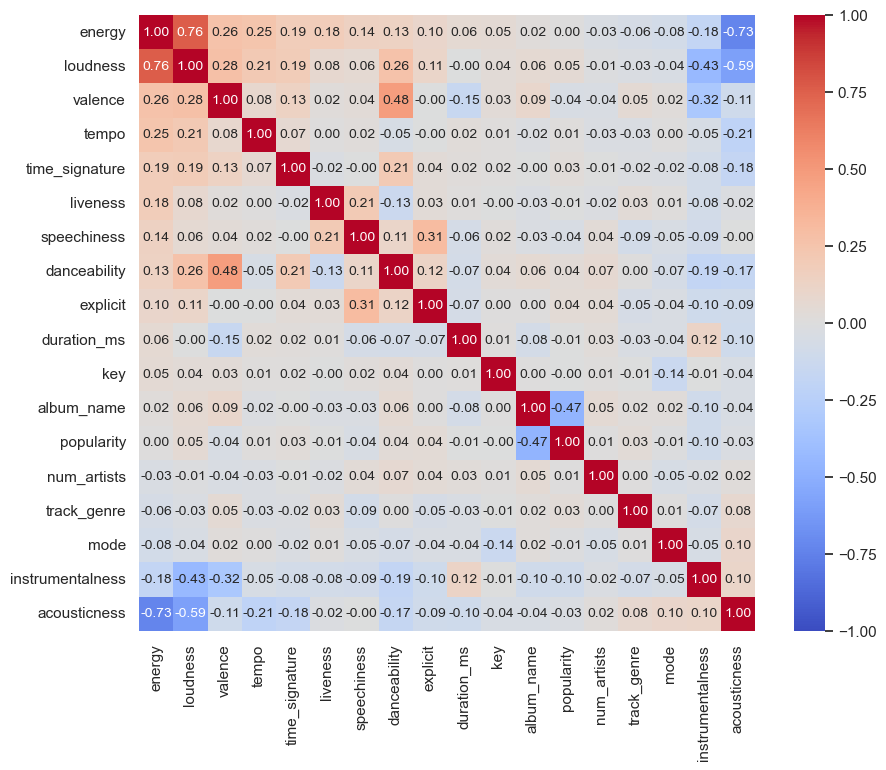

In [487]:
k = 20
corrmat = data.corr()
cols = corrmat.nlargest(k, 'energy')['energy'].index.tolist()
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

In [488]:
data.describe()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.000115,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,56.500000,1.388535
std,0.000206,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,32.907844,0.863542
min,0.000009,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000018,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,28.000000,1.000000
50%,0.000035,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.500000,1.000000
75%,0.000096,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000,2.000000
max,0.001711,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000,38.000000


In [489]:
data['popularity'].corr(data['energy'])

0.0010561362996985154

Небольшая корреляция есть, можно оставить фичу.

#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [490]:
new_data = data.drop(['album_name', 'track_genre'], axis=1)
y = new_data['energy']
X = new_data.drop(['energy'], axis=1)
columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [491]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [492]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [493]:
def RMSE(y_test_pred, y_test):
    return sqrt(mean_squared_error(y_test_pred, y_test))

def R2(y_test_pred, y_test):
    return r2_score(y_test, y_test_pred)

In [494]:
lr = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
y_test_pred = lr.predict(sm.add_constant(X_test_scaled))

print(f'Linear Regression results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Linear Regression results:
RMSE = 0.12151283193793637
R^2 = 0.7649873294007754


In [495]:
lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.766       
Dependent Variable: y                AIC:                -117338.3473
Date:               2023-10-23 22:59 BIC:                -117188.6469
No. Observations:   85500            Log-Likelihood:     58685.      
Df Model:           15               F-statistic:        1.866e+04   
Df Residuals:       85484            Prob (F-statistic): 0.00        
R-squared:          0.766            Scale:              0.014840    
-----------------------------------------------------------------------
             Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
const        0.6420     0.0004   1541.0130   0.0000    0.6412    0.6428
0           -0.0021     0.0004     -4.9957   0.0000   -0.0029   -0.0013
1            0.0049     0.0004     11.3636   0.0000    0.0040    0.0057
2           -0.0018     0.0004     -4.0618   0.0000   -0.0027   -0.0009
3           -0.0326     0.0005    -63.9296   0.0000   -0.0336   -0.0316
4            0.0013     0.0004      3.0033   0.0027    0.0004    0.0021
5            0.1351     0.0006    226.4404   0.0000    0.1340    0.1363
6           -0.0041     0.0004     -9.5333   0.0000   -0.0049   -0.0032
7            0.0279     0.0005     61.6689   0.0000    0.0270    0.0288
8           -0.1062     0.0005   -197.4225   0.0000   -0.1072   -0.1051
9            0.0350     0.0005     71.0346   0.0000    0.0340    0.0359
10           0.0259     0.0004     59.2994   0.0000    0.0250    0.0267
11           0.0410     0.0005     80.5809   0.0000    0.0400    0.0420
12           0.0073     0.0004     16.7462   0.0000    0.0064    0.0081
13           0.0061     0.0004     14.0226   0.0000    0.0052    0.0069
14          -0.0007     0.0004     -1.6911   0.0908   -0.0015    0.0001
---------------------------------------------------------------------
Omnibus:             4797.772       Durbin-Watson:          1.990    
Prob(Omnibus):       0.000          Jarque-Bera (JB):       19509.287
Skew:                0.094          Prob(JB):               0.000    
Kurtosis:            5.333          Condition No.:          3        
=====================================================================

"""

Выходит, что на уровне значимости 5% значимы все переменные, кроме созданной num_of_artists. 

In [496]:
ridge = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=0, alpha=0.03)
y_test_pred = ridge.predict(sm.add_constant(X_test_scaled))

print(f'Ridge results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Ridge results:
RMSE = 0.122934990195654
R^2 = 0.7594540692121716


In [497]:
ridge.params

array([ 0.6233042 , -0.00235763,  0.0050504 , -0.00145726, -0.02959862,
        0.00138168,  0.12991266, -0.00420362,  0.02674963, -0.10506599,
        0.03144318,  0.02592191,  0.03876854,  0.00851576,  0.00634586,
       -0.00107786])

In [498]:
lasso = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=1, alpha=0.05)
y_test_pred = lasso.predict(sm.add_constant(X_test_scaled))

print(f'Lasso results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Lasso results:
RMSE = 0.1549305357102141
R^2 = 0.6179492665266189


In [499]:
lasso.params

const    0.592003
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.095527
6        0.000000
7        0.000000
8       -0.078565
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
dtype: float64

In [500]:
en = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=0.04, alpha=0.01)
y_test_pred = en.predict(sm.add_constant(X_test_scaled))

print(f'ElasticNet results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

ElasticNet results:
RMSE = 0.12167505754894259
R^2 = 0.7643594035611937


In [501]:
en.params

const    0.635502
0       -0.001931
1        0.004580
2       -0.001247
3       -0.030731
4        0.000986
5        0.132866
6       -0.003746
7        0.026948
8       -0.105751
9        0.033087
10       0.025725
11       0.039455
12       0.007556
13       0.005751
14      -0.000530
dtype: float64

**Ridge** и **ElasticNet** справились лучше всего по нашим метрикам качества.

Так как имеют наименьшее стандратое отклонение от оригинальных данных и наибольший процент объясненной дисперсии.

Теперь проделаем то же самое используя sklearn.

In [502]:
lr_sk = LinearRegression()
lr_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = lr_sk.predict(X_test_scaled)

print(f'sklearn Linear Regression results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Linear Regression results:
RMSE = 0.12151283193793636
R^2 = 0.7649873294007755


In [503]:
ridge_sk = Ridge(alpha=0.03)
ridge_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = ridge_sk.predict(X_test_scaled)

print(f'sklearn Ridge results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Ridge results:
RMSE = 0.12151283129317347
R^2 = 0.7649873318947911


In [504]:
lasso_sk = Lasso(alpha=0.05)
lasso_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = lasso_sk.predict(X_test_scaled)

print(f'sklearn Lasso results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Lasso results:
RMSE = 0.14710712047919064
R^2 = 0.6555593645544673


In [505]:
en_sk = ElasticNet(alpha=0.01, l1_ratio=0.4)
en_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = en_sk.predict(X_test_scaled)

print(f'sklearn ElasticNet results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn ElasticNet results:
RMSE = 0.12246439091347833
R^2 = 0.7612921801365289


Результаты те же самые. По метрикам выигрывает **Ridge** модель.

#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [506]:
y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [507]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [508]:
lr = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
y_test_pred = lr.predict(sm.add_constant(X_test_scaled))

print(f'Linear Regression results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Linear Regression results:
RMSE = 0.1214871591698625
R^2 = 0.7650866240732952


In [509]:
ridge = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=0, alpha=0.03)
y_test_pred = ridge.predict(sm.add_constant(X_test_scaled))

print(f'Ridge results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Ridge results:
RMSE = 0.12291554469141225
R^2 = 0.7595301609248782


In [510]:
lasso = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=1, alpha=0.05)
y_test_pred = lasso.predict(sm.add_constant(X_test_scaled))

print(f'Lasso results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Lasso results:
RMSE = 0.1549305357102141
R^2 = 0.6179492665266189


In [511]:
en = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=0.04, alpha=0.01)
y_test_pred = en.predict(sm.add_constant(X_test_scaled))

print(f'ElasticNet results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

ElasticNet results:
RMSE = 0.12164269792962355
R^2 = 0.7644847246611767


In [512]:
lr_sk = LinearRegression()
lr_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = lr_sk.predict(X_test_scaled)

print(f'sklearn Linear Regression results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Linear Regression results:
RMSE = 0.1214871591698625
R^2 = 0.7650866240732952


In [513]:
ridge_sk = Ridge(alpha=0.03)
ridge_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = ridge_sk.predict(X_test_scaled)

print(f'sklearn Ridge results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Ridge results:
RMSE = 0.12148715859652869
R^2 = 0.7650866262905465


In [514]:
lasso_sk = Lasso(alpha=0.05)
lasso_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = lasso_sk.predict(X_test_scaled)

print(f'sklearn Lasso results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn Lasso results:
RMSE = 0.14710712047919064
R^2 = 0.6555593645544673


In [515]:
en_sk = ElasticNet(alpha=0.01, l1_ratio=0.4)
en_sk.fit(X_train_scaled, y_train)
y_test_pred_sk = en_sk.predict(X_test_scaled)

print(f'sklearn ElasticNet results:\nRMSE = {RMSE(y_test_pred_sk, y_test)}\nR^2 = {R2(y_test_pred_sk, y_test)}')

sklearn ElasticNet results:
RMSE = 0.12246439505063238
R^2 = 0.7612921640082319


In [516]:
en_sk.coef_

array([-0.        , -0.        ,  0.00130889, -0.        , -0.0229712 ,
        0.        ,  0.12877326, -0.00038277,  0.02264296, -0.10532971,
        0.02678268,  0.0239918 ,  0.03185409,  0.00604397,  0.00203099,
       -0.        , -0.        ])

Видно, что качество немного выросло по сравнению с моделями без категориальных признаков.

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

Проверим, какие коэффициенты получились в моделях нулевыми и какие параметры значимы.

Если **p-value >= 0.05**, то такую переменную будем считать незначимой.

### Linear Regression

Insignificant coefficients:
 Empty DataFrame
Columns: [Coefficient, p_value]
Index: []


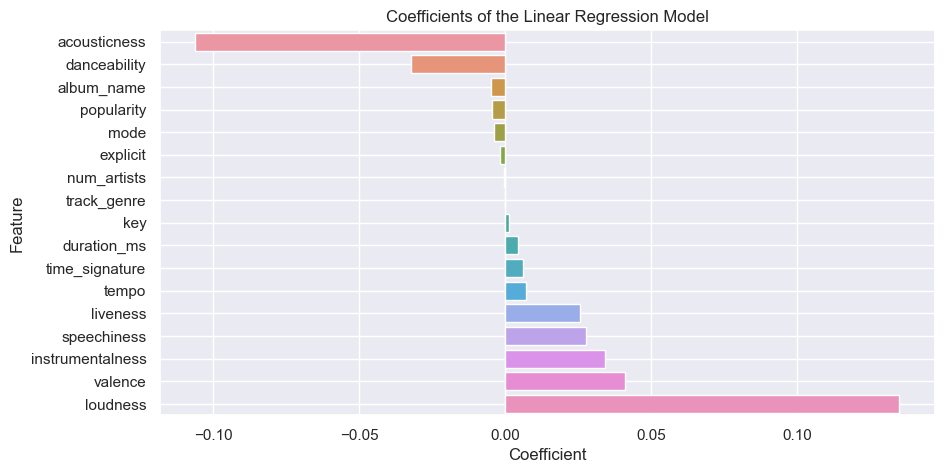

In [517]:
coef_df = pd.DataFrame(lr.params.values[1:], index=columns, columns=['Coefficient'])
coef_df['p_value'] = lr.pvalues[1:]
insignificant_coef = coef_df[coef_df['p_value'] > 0.05]
print("Insignificant coefficients:\n", insignificant_coef)
coef_df.reset_index(inplace=True)
coef_df.rename(columns={'index': 'Feature'}, inplace=True)
coef_df.sort_values(by='Coefficient', inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Coefficients of the Linear Regression Model")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [518]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:59:10   Log-Likelihood:                 58735.
No. Observations:               85500   AIC:                        -1.174e+05
Df Residuals:                   85482   BIC:                        -1.173e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1541.888      0.000       0.641       0.643
0             -0.0048      0.000     -9.925      0.000      -0.006      -0.004
1             -0.0045      0.000     -9.202      0.000      -0.005      -0.004
2              0.0045      0.000     10.545      0.000       0.004       0.005
3             -0.0017      0.000     -3.808      0.000      -0.003      -0.001
4             -0.0324      0.001    -63.580      0.000      -0.033      -0.031
5              0.0013      0.000      3.045      0.002       0.000       0.002
6              0.1351      0.001    226.478      0.000       0.134       0.136
7             -0.0040      0.000     -9.364      0.000      -0.005      -0.003
8              0.0275      0.000     60.439      0.000       0.027       0.028
9             -0.1064      0.001   -197.479      0.000      -0.107      -0.105
10             0.0344      0.000     69.111      0.000       0.033       0.035
11             0.0258      0.000     59.058      0.000       0.025       0.027
12             0.0411      0.001     80.668      0.000       0.040       0.042
13             0.0072      0.000     16.484      0.000       0.006       0.008
14             0.0060      0.000     13.942      0.000       0.005       0.007
15            -0.0002      0.000     -0.540      0.589      -0.001       0.001
16            -0.0005      0.000     -1.118      0.263      -0.001       0.000
==============================================================================
Omnibus:                     4819.123   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19695.303
Skew:                           0.093   Prob(JB):                         0.00
Kurtosis:                       5.344   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Посмотрев на **Prob(F-statistic)**, делаем вывод, что модель в целом значима.

### Ridge

In [519]:
zero_coefs = np.isclose(ridge_sk.coef_, 0)
print('Near-zero coefficients: \n', columns[zero_coefs[0]])

Near-zero coefficients: 
 Index([], dtype='object')


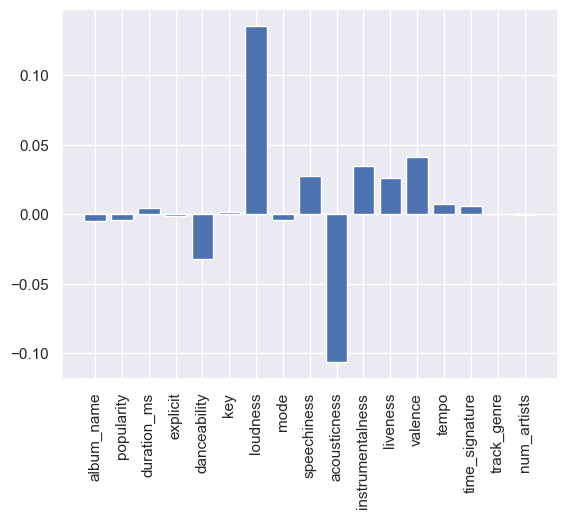

In [520]:
fig, ax = plt.subplots()
ax.bar(columns.tolist(), ridge_sk.coef_.tolist()[0])
plt.xticks(rotation=90)
plt.show()

### Lasso

In [521]:
zero_coefs = np.isclose(lasso_sk.coef_, 0)
print('Near-zero coefficients: \n', columns[zero_coefs[0]])

Near-zero coefficients: 
 [['album_name' 'popularity' 'duration_ms' 'explicit' 'danceability' 'key'
  'loudness' 'mode' 'speechiness' 'acousticness' 'instrumentalness'
  'liveness' 'valence' 'tempo' 'time_signature' 'track_genre'
  'num_artists']]


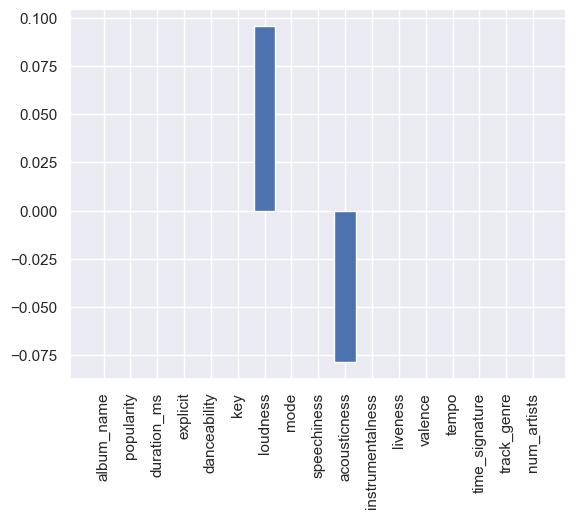

In [522]:
fig, ax = plt.subplots()
ax.bar(columns.tolist(), lasso_sk.coef_)
plt.xticks(rotation=90)
plt.show()

### ElasticNet

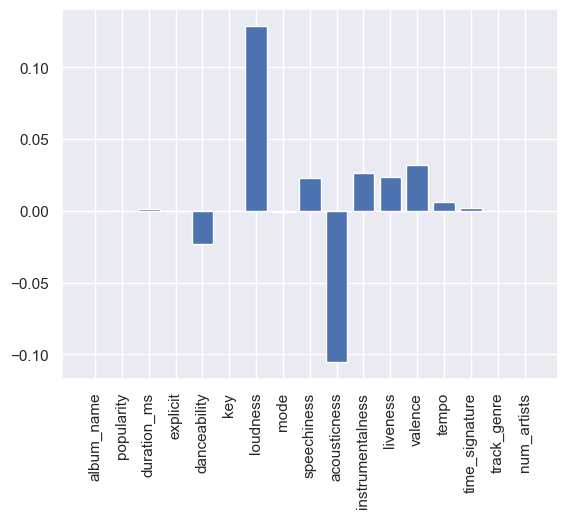

In [523]:
fig, ax = plt.subplots()
ax.bar(columns.tolist(), en_sk.coef_)
plt.xticks(rotation=90)
plt.show()

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

### Elimination by P-value

In [524]:
max_pvalue = 1
alpha = 0.05

while max_pvalue > alpha:
    model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
    pvalues = model.pvalues  
    max_pvalue = max(pvalues)
    if max_pvalue > alpha:
        remove_variable = pvalues.idxmax()
        X_train_scaled = X_train_scaled.drop(remove_variable, axis=1)
        X_test_scaled = X_test_scaled.drop(remove_variable, axis=1)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.869e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:59:11   Log-Likelihood:                 58734.
No. Observations:               85500   AIC:                        -1.174e+05
Df Residuals:                   85484   BIC:                        -1.173e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1541.893      0.000       0.641       0.643
0             -0.0048      0.000    -10.023      0.000      -0.006      -0.004
1             -0.0045      0.000     -9.259      0.000      -0.005      -0.004
2              0.0045      0.000     10.522      0.000       0.004       0.005
3             -0.0017      0.000     -3.817      0.000      -0.003      -0.001
4             -0.0324      0.001    -63.906      0.000      -0.033      -0.031
5              0.0013      0.000      3.047      0.002       0.000       0.002
6              0.1351      0.001    226.620      0.000       0.134       0.136
7             -0.0040      0.000     -9.319      0.000      -0.005      -0.003
8              0.0275      0.000     60.700      0.000       0.027       0.028
9             -0.1064      0.001   -197.816      0.000      -0.107      -0.105
10             0.0344      0.000     69.388      0.000       0.033       0.035
11             0.0258      0.000     59.119      0.000       0.025       0.027
12             0.0411      0.001     80.983      0.000       0.040       0.042
13             0.0072      0.000     16.500      0.000       0.006       0.008
14             0.0060      0.000     13.970      0.000       0.005       0.007
==============================================================================
Omnibus:                     4811.811   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19651.400
Skew:                           0.092   Prob(JB):                         0.00
Kurtosis:                       5.341   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
y_test_pred = model.predict(sm.add_constant(X_test_scaled))

print(f'Linear Regression results:\nRMSE = {RMSE(y_test_pred, y_test)}\nR^2 = {R2(y_test_pred, y_test)}')

Linear Regression results:
RMSE = 0.12148109365225845
R^2 = 0.765110080637049


Метрики не сильно пострадали, поскольку отбросились только самые незначимые признаки, где коэффициенты были близкими к нулю.

#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

Будем использовать модель **LassoCV** из sklearn.

In fit, once the best parameter alpha is found through cross-validation, the model is fit again using the entire training set.

LassoCV leads to different results than a hyperparameter search using GridSearchCV with a Lasso model. In LassoCV, a model for a given penalty alpha is warm started using the coefficients of the closest model (trained at the previous iteration) on the regularization path. It tends to speed up the hyperparameter search.

In [526]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, 3, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=7)
lasso_cv.fit(X_train_scaled, y_train.ravel())
y_pred = lasso_cv.predict(X_test_scaled)
best_alpha = lasso_cv.alpha_

print(f"alpha = {best_alpha}\nRMSE = {RMSE(y_test, y_pred)}.")

alpha = 0.0001
RMSE = 0.1214800440773728.


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [527]:
from sklearn.base import BaseEstimator
from numpy.linalg import norm

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf=1e-3, epsilon=1e-8):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.reg_cf = reg_cf
        self.epsilon = epsilon
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []

        l, d = X.shape
        if self.w0 is None:
            self.w = np.random.normal(size=(d, 1))
        else:
            self.w = self.w0

        prev_w = self.w + 10 * self.tolerance
        v_t = np.zeros_like(self.w)

        for i in range(self.max_iter):
            prev_w = self.w.copy()
            gradient = self.calc_gradient(X, y)
            if self.gd_type == 'Momentum':
                v_t = self.alpha * v_t + self.eta * self.calc_gradient(X, y)
                self.w -= v_t
                
            elif self.gd_type == 'StochasticDescent':
                rand_idx = np.random.choice(l, int(l*self.delta), replace=False)
                gradient = self.calc_gradient(X[rand_idx], y[rand_idx])
                    
            elif self.gd_type == 'Adagrad':
                g_t = self.calc_gradient(X, y)
                v_t += g_t**2
                self.w -= self.eta / (np.sqrt(v_t) + self.epsilon) * g_t
                
            else: # El clasico
                self.w -= self.eta * self.calc_gradient(X,y)

            self.loss_history.append(self.calc_loss(X, y))
            
            if norm(self.w - prev_w) < self.tolerance:
                break

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X @ self.w
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2/X.shape[0]*(X.T @ (X @ self.w - y)) + 2 * self.reg_cf * self.w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return ((X @ self.w - y) ** 2).mean() + self.reg_cf * norm(self.w)**2

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [528]:
model = LinReg()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"My model MSE: {mean_squared_error(y_test, y_pred)}")

My model MSE: 0.4263055961718917


In [529]:
ridge = Ridge(alpha=1e-3)
ridge.fit(X_train_scaled, y_train)
ridge_y_pred = ridge.predict(X_test_scaled)
print(f"Sklearn MSE: {mean_squared_error(y_test, ridge_y_pred)}")

Sklearn MSE: 0.014757656109390845


In [530]:
ridge_sm = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit_regularized(L1_wt=0, alpha=1e-3)
ridge_sm_y_pred = ridge_sm.predict(sm.add_constant(X_test_scaled))
print(f"Statsmodels Model MSE: {mean_squared_error(y_test, ridge_sm_y_pred)}")

Statsmodels Model MSE: 0.014756960486978377


По MSE ручная модель явно проигрывает.

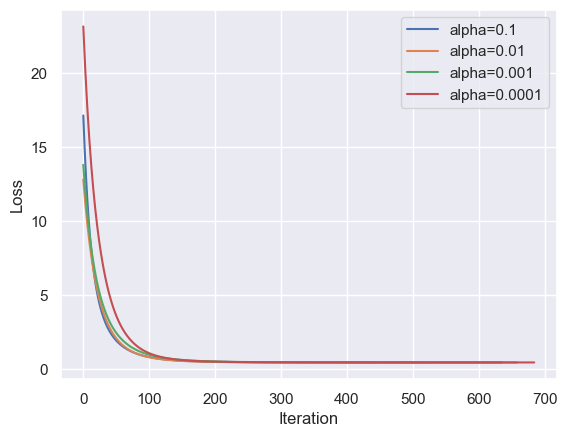

In [531]:
alphas = [0.1, 1e-2, 1e-3, 1e-4]

for alpha in alphas:
    model = LinReg(gd_type='el classico', alpha=alpha)
    model.fit(X_train_scaled, y_train)
    plt.plot(model.loss_history, label=f'alpha={alpha}')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

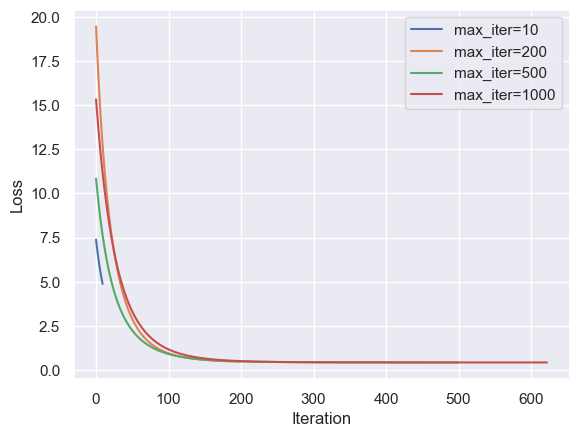

In [532]:
max_iters = [10, 200, 500, 1000]

for max_iter in max_iters:
    model = LinReg(gd_type='el classico', max_iter=max_iter)
    model.fit(X_train_scaled, y_train)
    plt.plot(model.loss_history, label=f'max_iter={max_iter}')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Выводы:

Чем меньше альфа, тем меньше лосс.

Чем больше число итераций, тем меньше лосс.

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

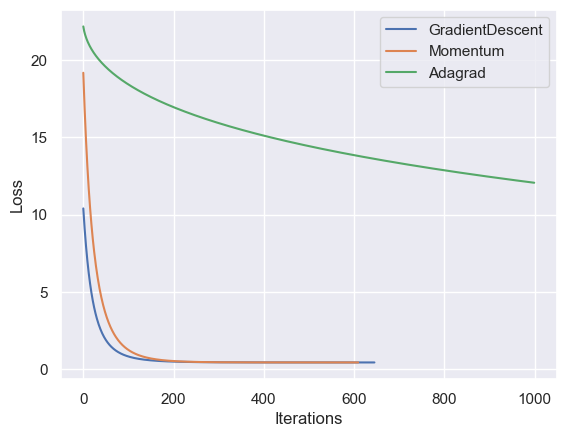

In [533]:
for gd_type in ['GradientDescent',  'Momentum', 'Adagrad']:
    model = LinReg(gd_type=gd_type)
    model.fit(X_train_scaled, y_train)
    plt.plot(model.loss_history, label=gd_type)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Видно, что быстрее всего сходится полный градиентный спуск. Чуть медленнее сходится Momentum. Еще медленней - Adagrad.